In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from utils import get_child_categories_count_by_parent_categories

In [2]:
def prepare_category(x):
    result = x.split('\n')
    result.pop(0)
    return ''.join(result).split(', ')

data = pd.read_csv('../datasets/electronics_1/final_data.csv')
data = data[['Category', 'Description']]
data = data.rename(columns={ 'Category': 'category', 'Description': 'description' })
print(f"Num. of obs. where cat is None: {data[(data['category'].isna())].size}")
print(f"Num. of obs. where desc is None: {data[(data['description'].isna())].size}")
data = data.dropna()
print(f"Num. of obs. where cat is None: {data[(data['category'].isna())].size}")
print(f"Num. of obs. where desc is None: {data[(data['description'].isna())].size}")
data['category'] = data['category'].apply(prepare_category)
data

Num. of obs. where cat is None: 4
Num. of obs. where desc is None: 4
Num. of obs. where cat is None: 0
Num. of obs. where desc is None: 0


,category,description
0,"[Office/Business, Database, Security, Desktop ...","KeePass Password Safe is a free, open source, ..."
1,"[Database Engines/Servers, Dynamic Content, Si...",XAMPP is a very easy to install Apache Distrib...
2,"[Investment Management, Spreadsheet, Front-End...",Technical analysis library with indicators lik...
3,"[Database Engines/Servers, Site Management, HT...",AppServ is an merging open source software ins...
4,"[Word Processors, Office Suites, Front-Ends]",LibreOffice is a free and powerful office suit...
...,...,...
33765,[File Managers],Find recursively corrupted or password protect...
33766,[Emulators],*** This repository has been migrated here: ht...
33767,"[Hardware, Hardware Drivers]",Phoebetria lets you take control of your BitFe...
33768,"[Software Distribution, Live CD]",- English (Thanks Steve for translation this t...


In [3]:
data['category_count'] = data['category'].str.len()

set([i for x in data[data['category_count'] == 1]['category'].values for i in x])

{'3D Modeling',
 '3D Printing',
 '3D Rendering',
 'AJAX',
 'AOL Instant Messenger',
 'Accounting',
 'Admin Templates',
 'Agile Development Tools',
 'Algorithms',
 'Animation',
 'Anti-Malware',
 'Anti-Spam',
 'Antivirus',
 'Application Servers',
 'Artificial Intelligence',
 'Assemblers',
 'Astronomy',
 'Audio Analysis',
 'Audio Conversion',
 'Audio Editing',
 'Audio Mixers',
 'Audio Recording',
 'Augmented Reality',
 'Authentication/Directory',
 'Auto Clicker',
 'Automated Testing',
 'BBS',
 'Backup',
 'Battery Monitoring',
 'Billing',
 'Bio-Informatics',
 'BitTorrent',
 'Blogging',
 'Board Games',
 'Boot',
 'Browser Extensions and Plugins',
 'Browsers',
 'Build Tools',
 'Building Automation',
 'Business Intelligence',
 'Business Performance Management',
 'CD Ripping',
 'CGI Scripts',
 'CORBA',
 'CRM',
 'CSV',
 'CVS',
 'Calculators',
 'Calendar',
 'Capture',
 'Card Games',
 'Cataloguing',
 'Chat',
 'Chatbot',
 'Chemistry',
 'Code Generators',
 'Code Review',
 'Codec',
 'Collection Manag

In [4]:
data[data['category_count'] == 1]

,category,description,category_count
5,[Database Engines/Servers],Firebird RDBMS offers ANSI SQL features & runs...,1
14,[Database],SQLite JDBC is a library for accessing and cre...,1
18,[Database Engines/Servers],Nextcloud server is a free and open source ser...,1
29,[Database],MySQLdb is a Python DB API-2.0-compliant inter...,1
32,[Front-Ends],ERMaster is Eclipse plug-in to make ER diagram...,1
...,...,...,...
33761,[ROMs],"An Open Source OS, based on Android, that inco...",1
33762,[ROMs],"EPIC ROM IS A CUSTOM ROM BASED ON MIUI, BUT WI...",1
33764,[Remote Desktop],The script installs dependencies and configure...,1
33765,[File Managers],Find recursively corrupted or password protect...,1


In [5]:
data = data[data['category_count'] != 1]

In [6]:
data.shape

(23768, 3)

In [7]:
categories_count = Counter({})

for x in data['category']:
    categories_count += Counter(x)

In [8]:
all_unique_categories = list(set([k for x in data['category'] for k in x]))

len(all_unique_categories)

499

In [9]:
parent_unique_categories = list(set([x[0] for x in data['category']]))

len(parent_unique_categories)

299

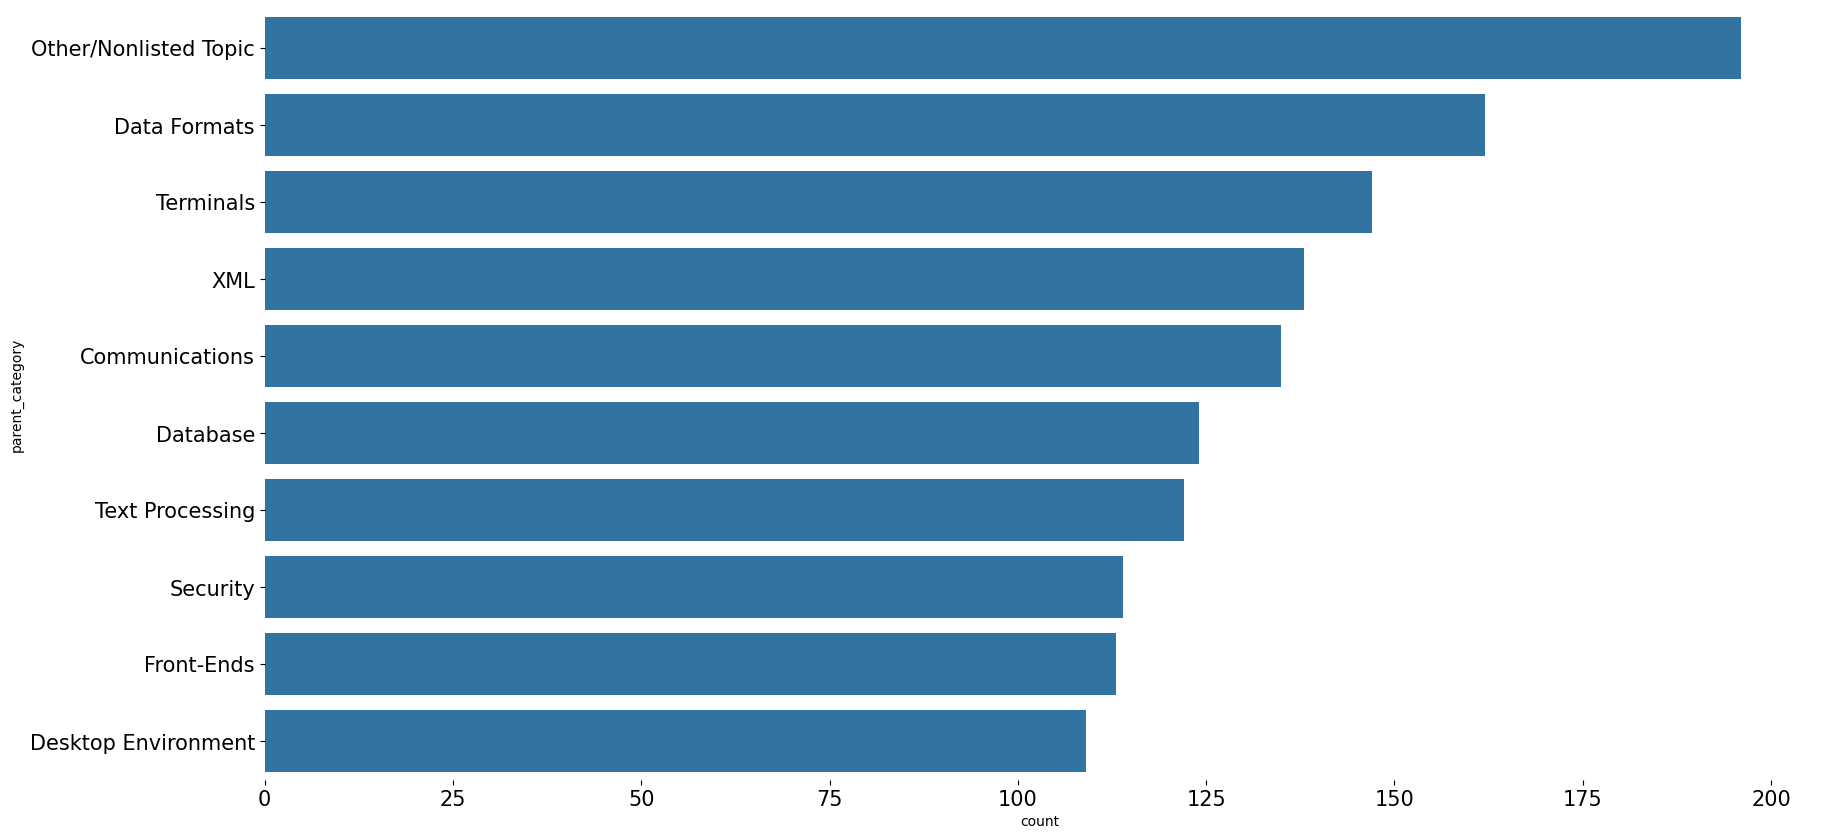

In [11]:
categories_count = get_child_categories_count_by_parent_categories(data).sort_values(by='count', ascending=False)[:10]

keys = categories_count['parent_category']
# get values in the same order as keys, and parse percentage values
vals = categories_count['count']

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.figure.savefig('./Big_basket/parent_categories_with_child_categories_counts.png')

In [12]:
get_child_categories_count_by_parent_categories(data).sort_values(by='count', ascending=False)[:10]

,parent_category,count
115,Other/Nonlisted Topic,196
255,Data Formats,162
244,Terminals,147
213,XML,138
201,Communications,135
62,Database,124
22,Text Processing,122
147,Security,114
125,Front-Ends,113
119,Desktop Environment,109


/tmp/ipykernel_24166/708169020.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["description"].apply(count_words))


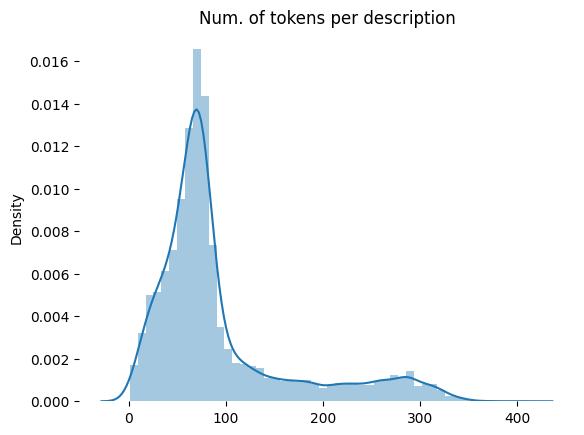

In [13]:
def count_words(x):
    return len(x.split())

ax = sns.distplot(data["description"].apply(count_words))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Num. of tokens per description")
plt.xlabel("")
plt.show()

In [14]:
data["description"].apply(count_words).describe()

count    23768.000000
mean        93.869152
std         73.076086
min          1.000000
25%         53.000000
50%         71.000000
75%         99.000000
max        407.000000
Name: description, dtype: float64

In [15]:
data = data[(data['description'].str.split().str.len() > 10) & (data['description'].str.split().str.len() <= 300)]

In [16]:
data.shape

(22876, 3)

In [17]:
data = data.reset_index()
data = data.drop(['index'], axis=1)

In [20]:
data.head(1)

,category,description,category_count
0,"[Office/Business, Database, Security, Desktop ...","KeePass Password Safe is a free, open source, ...",6


In [21]:
data['parent_category'] = data['category'].apply(lambda x: x[0])

data

,category,description,category_count,parent_category
0,"[Office/Business, Database, Security, Desktop ...","KeePass Password Safe is a free, open source, ...",6,Office/Business
1,"[Database Engines/Servers, Dynamic Content, Si...",XAMPP is a very easy to install Apache Distrib...,4,Database Engines/Servers
2,"[Investment Management, Spreadsheet, Front-End...",Technical analysis library with indicators lik...,5,Investment Management
3,"[Database Engines/Servers, Site Management, HT...",AppServ is an merging open source software ins...,3,Database Engines/Servers
4,"[Word Processors, Office Suites, Front-Ends]",LibreOffice is a free and powerful office suit...,3,Word Processors
...,...,...,...,...
22871,"[OS distribution, Live CD]","The eznixOS is a respin of Debian GNU/Linux, c...",2,OS distribution
22872,"[Games/Entertainment, Emulators]",Denise is a cycle accurate and platform indepe...,2,Games/Entertainment
22873,"[Hardware, Hardware Drivers]",Phoebetria lets you take control of your BitFe...,2,Hardware
22874,"[Software Distribution, Live CD]",- English (Thanks Steve for translation this t...,2,Software Distribution


In [22]:
data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())

/tmp/ipykernel_24166/1204828366.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())


parent_category
3D Modeling               99.769231
3D Rendering             100.789474
AJAX                     187.000000
AOL Instant Messenger     58.333333
Accounting               103.076923
                            ...    
Workflow Management      108.555556
XML                       75.116438
XML-RPC                   64.250000
XMPP                     109.000000
eCommerce                116.142857
Length: 297, dtype: float64

/tmp/ipykernel_24166/2330266193.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())


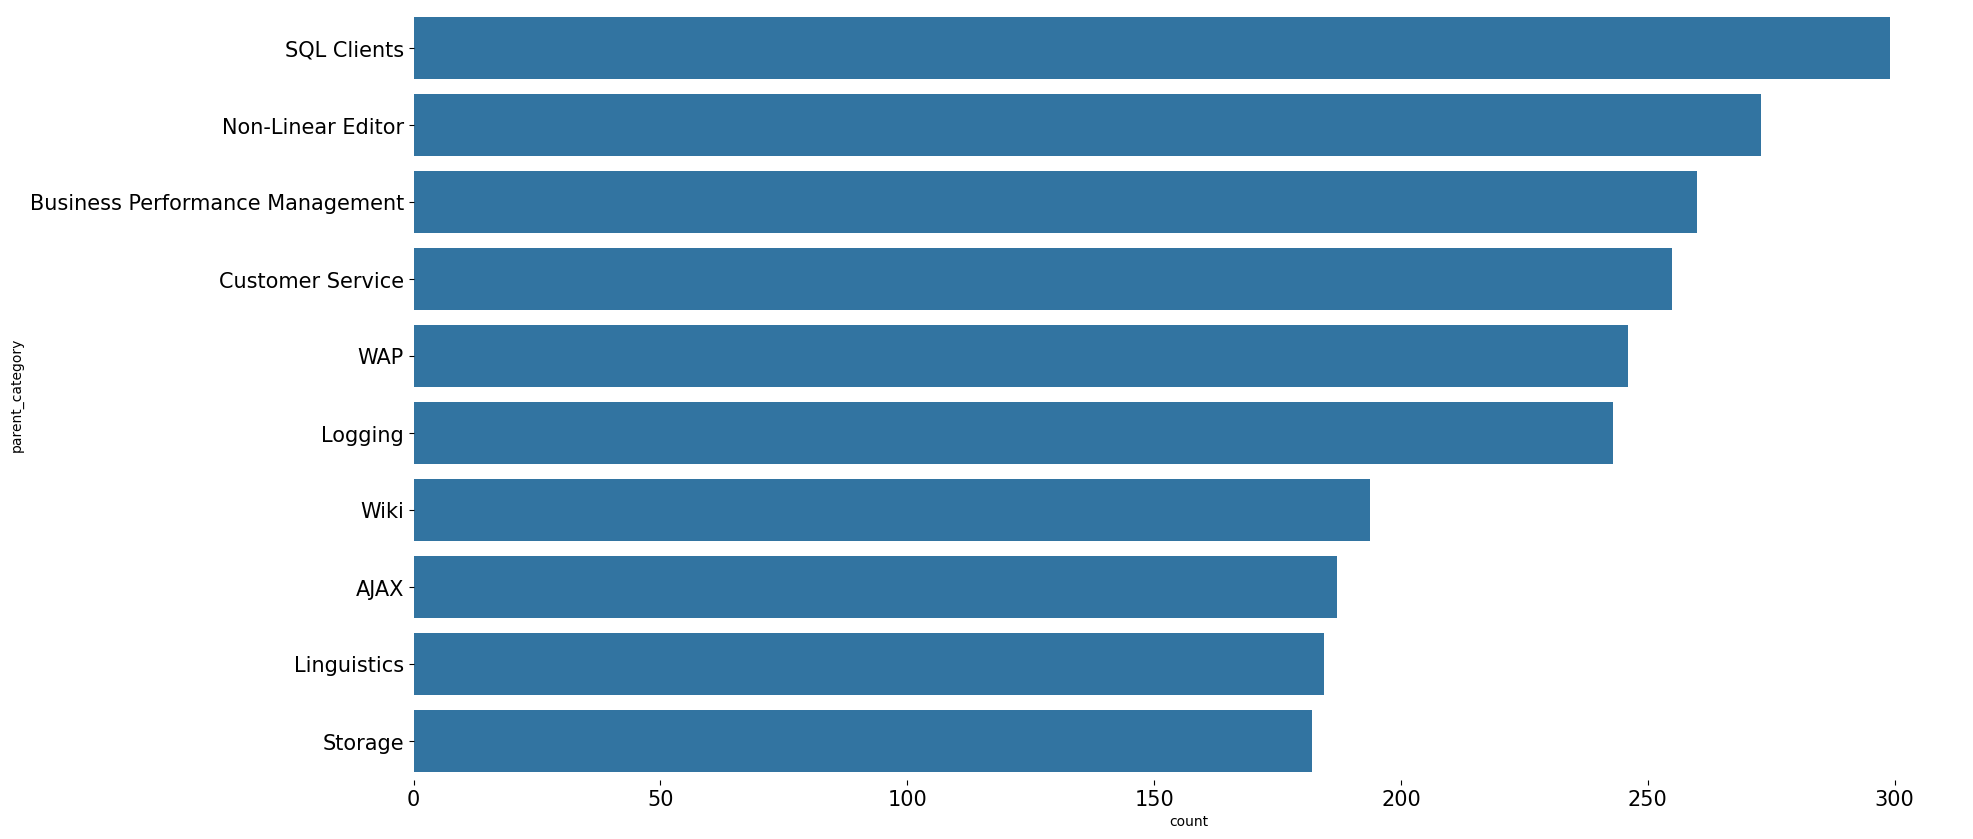

In [39]:
categories_counts = pd.DataFrame(
    data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())
)

categories_counts = categories_counts.reset_index()
categories_counts = categories_counts.rename(columns={ 0: 'count' })
categories_counts = categories_counts.sort_values(by='count', ascending=False)[:10]

keys = categories_counts['parent_category']
# # get values in the same order as keys, and parse percentage values
vals = categories_counts['count']

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [40]:
categories_counts

,parent_category,count
225,SQL Clients,299.000000
188,Non-Linear Editor,273.000000
34,Business Performance Management,260.000000
63,Customer Service,255.000000
285,WAP,246.000000
162,Logging,243.000000
288,Wiki,193.666667
2,AJAX,187.000000
157,Linguistics,184.333333
254,Storage,182.000000


In [41]:
import statistics

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def confidence_interval(data, confidence=0.95):
  dist = statistics.NormalDist.from_samples(data)
  z = statistics.NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h

# confidence_interval(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
a = data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens]))
scipy.stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=scipy.stats.sem(a))

(5.793822513614508, 5.820524590158099)

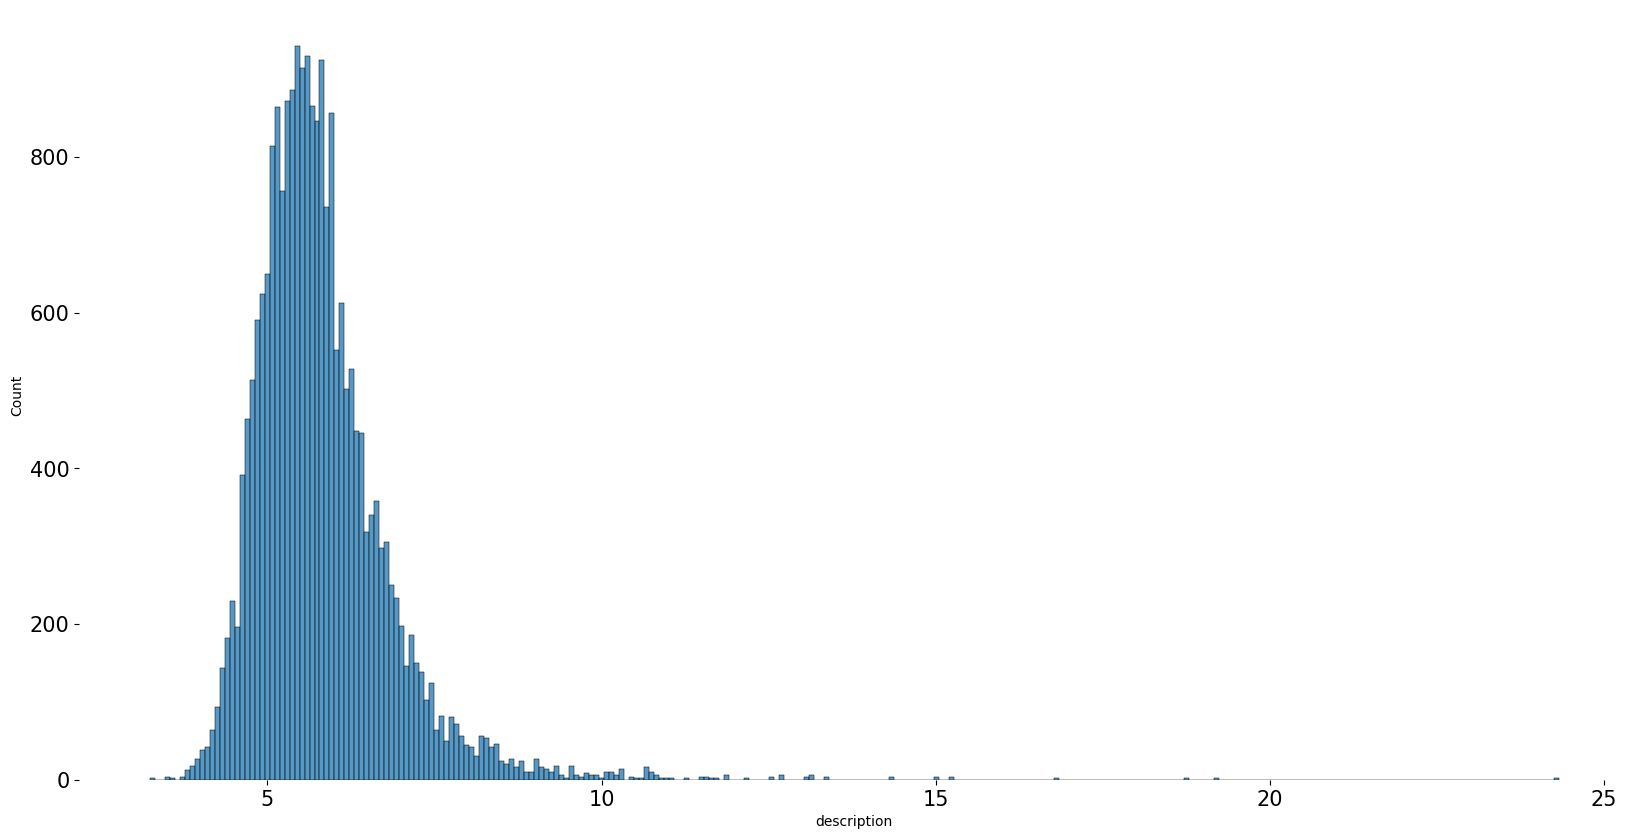

In [42]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [46]:
data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])).describe()

count    22876.000000
mean         5.807174
std          1.030230
min          3.238095
25%          5.160494
50%          5.643836
75%          6.222222
max         24.320000
Name: description, dtype: float64

In [60]:
chars_count_per_parent_category = data.groupby(['parent_category']) \
    .apply(lambda row: row['description'].str.split().values) \
    .apply(lambda x: np.mean([len(j) for i in x for j in i]))


chars_count_per_parent_category = pd.DataFrame(chars_count_per_parent_category)

chars_count_per_parent_category = chars_count_per_parent_category.reset_index()

chars_count_per_parent_category = chars_count_per_parent_category.rename(columns={ 0: 'count' })

chars_count_per_parent_category = chars_count_per_parent_category.sort_values(by='count', ascending=False)

chars_count_per_parent_category

/tmp/ipykernel_24166/3897409299.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row['description'].str.split().values) \


,parent_category,count
284,Voting,10.054054
210,Profiling,7.528455
172,Mapping,7.455782
189,OLAP,7.373737
51,Collaborative Development,7.257143
...,...,...
39,CVS,4.716049
169,Machine Translation,4.696855
59,Console Games,4.652449
45,Cheat Engines,4.640000


In [65]:
chars_count_per_parent_category = chars_count_per_parent_category[:10]

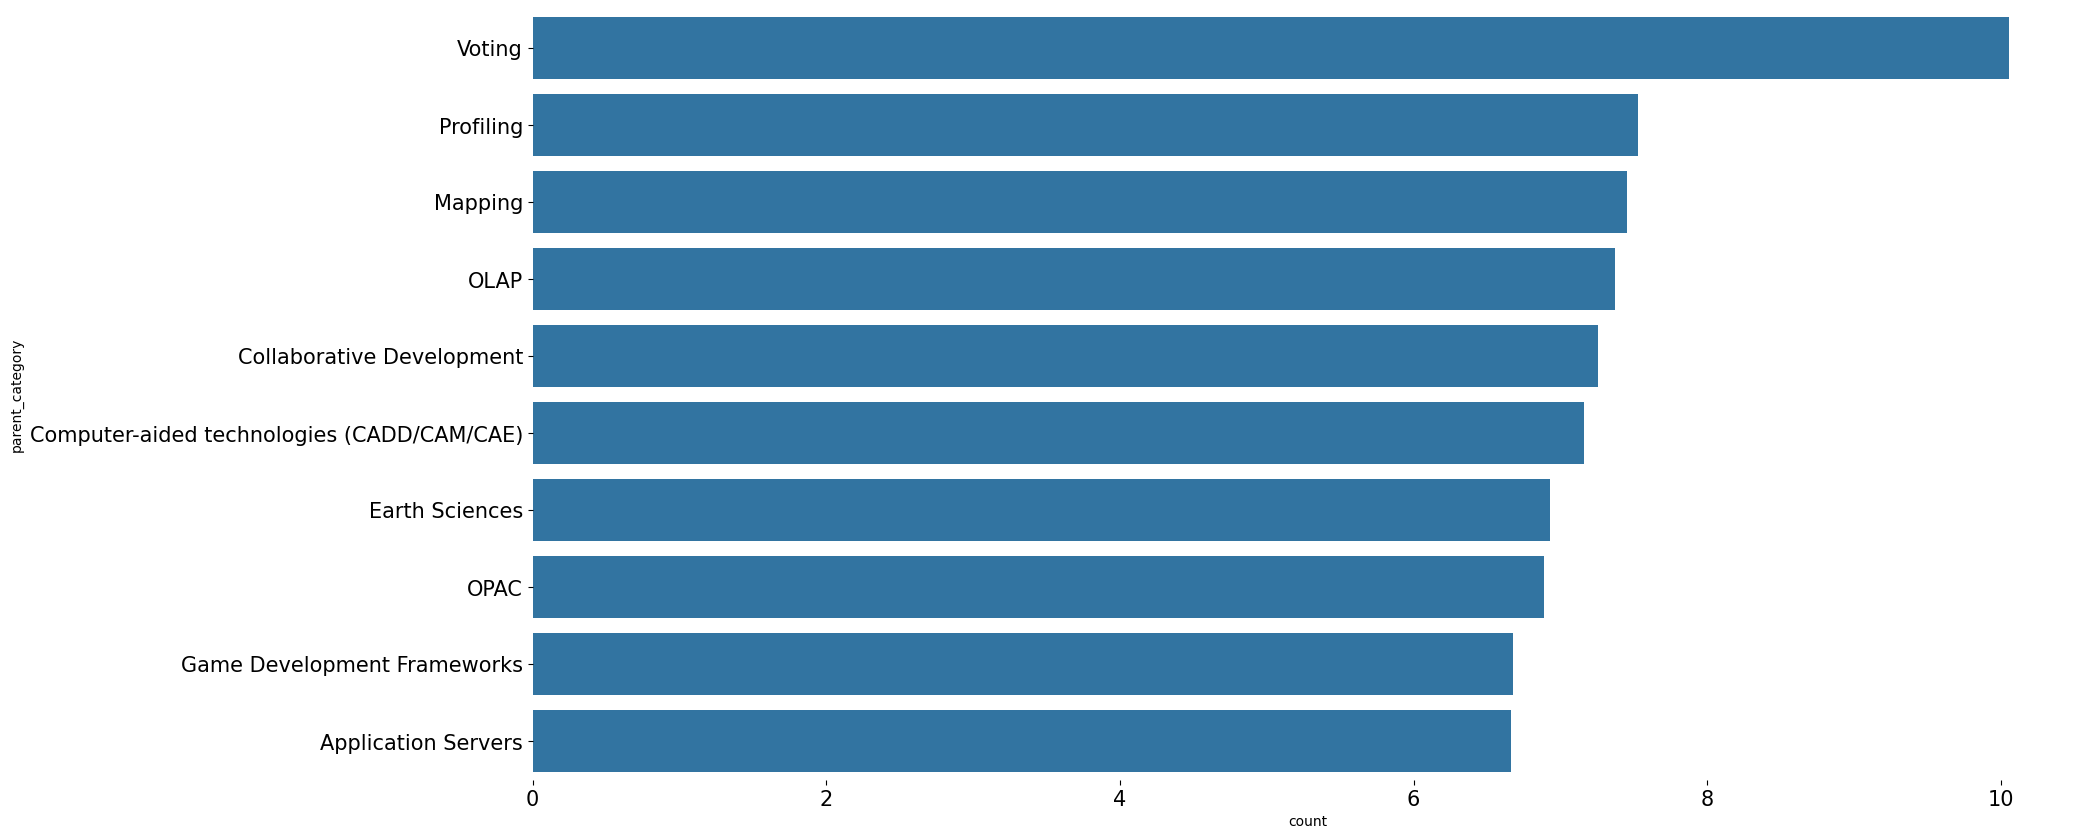

In [66]:
keys = chars_count_per_parent_category['parent_category']
# get values in the same order as keys, and parse percentage values
vals = chars_count_per_parent_category['count']

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [67]:
chars_count_per_parent_category

,parent_category,count
284,Voting,10.054054
210,Profiling,7.528455
172,Mapping,7.455782
189,OLAP,7.373737
51,Collaborative Development,7.257143
57,Computer-aided technologies (CADD/CAM/CAE),7.162791
81,Earth Sciences,6.927900
190,OPAC,6.885246
114,Game Development Frameworks,6.679739
9,Application Servers,6.666667


In [68]:
words_counter = Counter()

for tokens in data['description'].str.split():
    words_counter += Counter(tokens)

words_counter_x, words_counter_y= [], []

for word,count in words_counter.most_common(15):
    words_counter_x.append(word)
    words_counter_y.append(count)

In [69]:
words_counter.most_common(15)

[('and', 76028),
 ('the', 52838),
 ('a', 51538),
 ('to', 50922),
 ('is', 46776),
 ('for', 38302),
 ('of', 33792),
 ('in', 22540),
 ('with', 17530),
 ('on', 15940),
 ('can', 13022),
 ('It', 12876),
 ('or', 11316),
 ('that', 11242),
 ('an', 10960)]

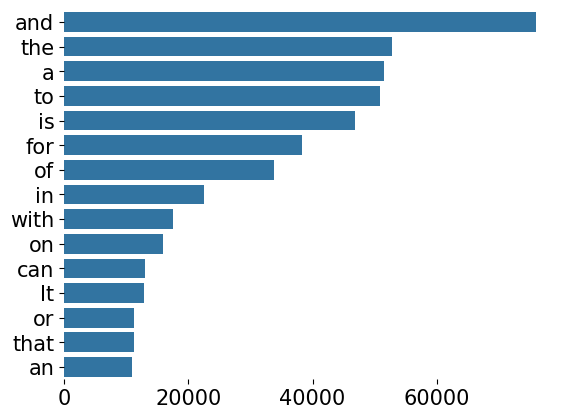

In [70]:
ax = sns.barplot(x=words_counter_y, y=words_counter_x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

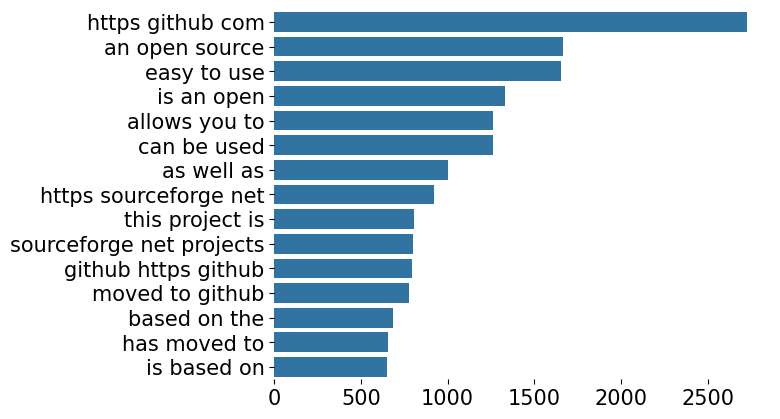

In [73]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

top_n_bigrams=get_top_ngram(data['description'], 3)[:15]
x,y=map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y,y=x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [74]:
top_n_bigrams

[('https github com', 2724),
 ('an open source', 1666),
 ('easy to use', 1654),
 ('is an open', 1328),
 ('allows you to', 1262),
 ('can be used', 1260),
 ('as well as', 1000),
 ('https sourceforge net', 924),
 ('this project is', 804),
 ('sourceforge net projects', 800),
 ('github https github', 792),
 ('moved to github', 778),
 ('based on the', 684),
 ('has moved to', 656),
 ('is based on', 652)]